# A bunch of running metric updaters

Can be used to find running batch metrics over an epoch of training

In [1]:
import writefile_run
filename = '../package/pytorch_utils/updaters.py'

In [2]:
%%writefile_run $filename 


def averager():
    """A running averager"""
    s = yield
    n = 1
    while True:
        s += yield s/n
        n += 1

In [3]:
%%writefile_run $filename -a


def maxxer():
    """A running updater which takes max of the metric"""
    running_max = yield
    while True:
        x = yield running_max
        running_max = max(running_max, x)

In [4]:
%%writefile_run $filename -a


def minner():
    """A running updater which takes min of the metric"""
    running_min = yield
    while True:
        x = yield running_min
        running_min = min(running_min, x)

In [5]:
%%writefile_run $filename -a


def latest():
    """A running updater which returns the latest sample"""
    a = yield
    while True:
        a = yield a

# Testing

In [6]:
from pytorch_utils.nb_figure import *

In [7]:
from pylab import *

In [8]:
rcParams['figure.figsize'] = 18,7
rcParams['axes.grid'] = True
style.use('dark_background')

In [9]:
def test_updater(updater):
    nf = NBFigure(image_path='testing_plot.png')
    nf.display()
    
    ax = nf.getAxis()
    inp, = ax.plot([])
    l, = ax.plot([],'--')
    
    ax.legend(['Input', 'Output'])
    
    x = []
    y = []
    inputs = []
    next(updater)
    for i in range(50):
        x.append(i)
        
        r = randn()
        inputs.append(r)
        y.append(updater.send(r))
        
        l.set_data(x,y)
        inp.set_data(x,inputs)
        
        nf.update()

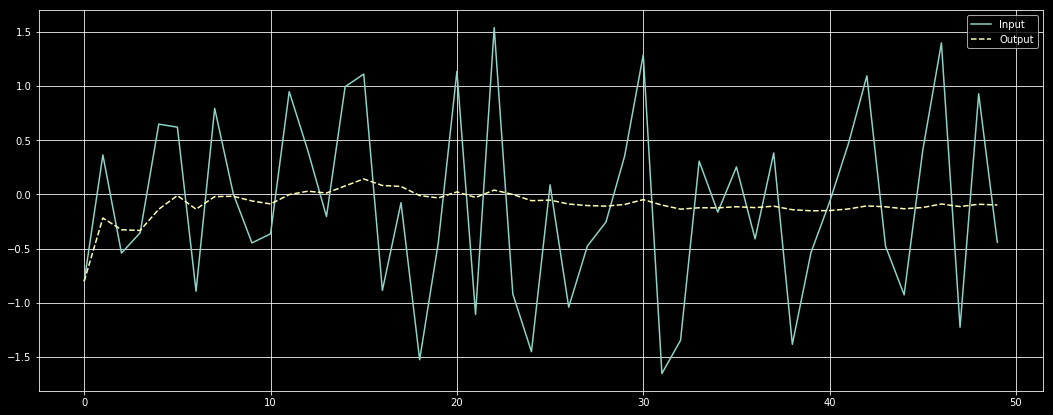

In [10]:
test_updater(averager())

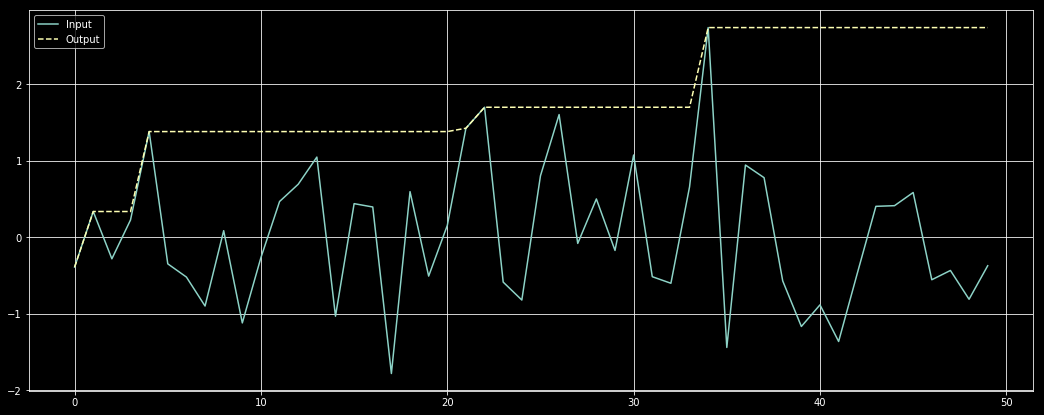

In [11]:
test_updater(maxxer())

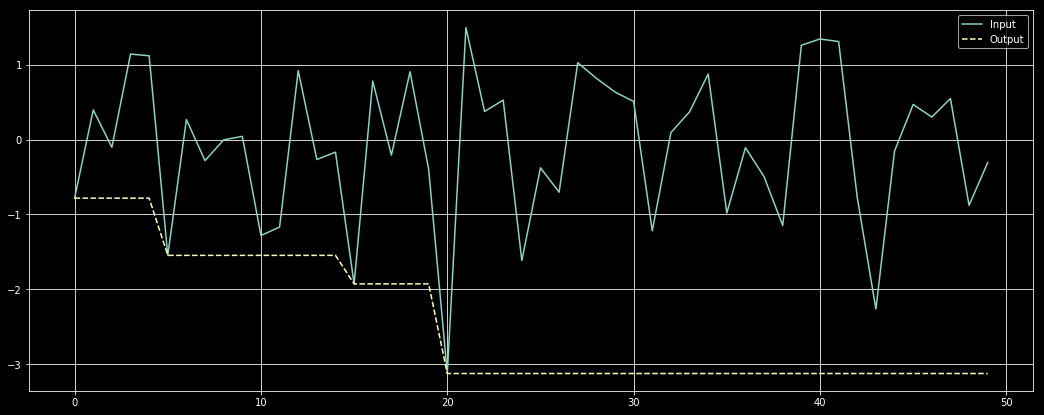

In [12]:
test_updater(minner())

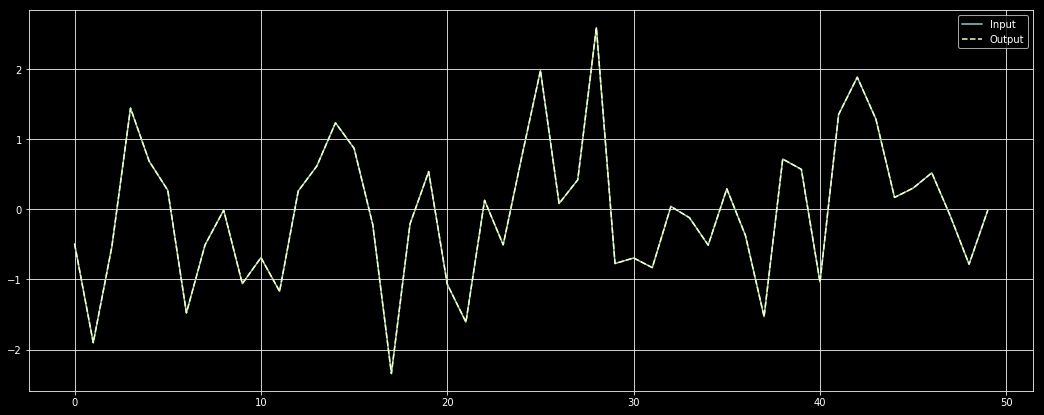

In [13]:
test_updater(latest())